## 欠損値の処理

In [313]:
from modules.constants import local_paths
from modules import predict
import os
import numpy as np
import pandas as pd
import pickle

%load_ext autoreload 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [314]:
%autoreload

In [315]:
df = pd.read_csv(os.path.join(local_paths.FEATURES_DIR, 'features_2022.csv'), index_col=0,  sep="\t")

In [316]:
df.columns

Index(['race_id', 'horse_id', 'jockey_id', 'trainer_id', 'owner_id', 'rank',
       'frame', 'number', 'sex', 'age', 'impost', 'win_odds', 'popularity',
       'weight', 'weight_diff', 'date', 'race_type', 'around', 'course_len',
       'weather', 'ground_state', 'race_class', 'place', 'reference_date',
       'rank_mean', 'rank_min', 'rank_max', 'rank_std', 'n_horses_mean',
       'rank_diff_mean', 'rank_diff_std', '3_furlongs_mean', '3_furlongs_std',
       'prize_mean', 'prize_sum', 'course_len_mean', 'course_len_min',
       'course_len_max', 'weather_mode', 'race_type_mode', 'ground_state_mode',
       'consistency', 'time_per_course_len', 'course_len_mode',
       'same_course_len_avg_rank', 'days_since_last_race',
       'race_interval_category', 'parent_0', 'parent_1', 'parent_2',
       'parent_3', 'parent_4', 'parent_5'],
      dtype='object')

In [317]:
df.isnull().sum()

race_id                        0
horse_id                       0
jockey_id                      0
trainer_id                     0
owner_id                       0
rank                           0
frame                          0
number                         0
sex                            0
age                            0
impost                         0
win_odds                       0
popularity                     0
weight                         0
weight_diff                    0
date                           0
race_type                      0
around                      1665
course_len                   349
weather                      335
ground_state                 335
race_class                  7389
place                       2381
reference_date              4713
rank_mean                   4713
rank_min                    4713
rank_max                    4713
rank_std                    9015
n_horses_mean               4713
rank_diff_mean              4717
rank_diff_

In [318]:
df.columns

Index(['race_id', 'horse_id', 'jockey_id', 'trainer_id', 'owner_id', 'rank',
       'frame', 'number', 'sex', 'age', 'impost', 'win_odds', 'popularity',
       'weight', 'weight_diff', 'date', 'race_type', 'around', 'course_len',
       'weather', 'ground_state', 'race_class', 'place', 'reference_date',
       'rank_mean', 'rank_min', 'rank_max', 'rank_std', 'n_horses_mean',
       'rank_diff_mean', 'rank_diff_std', '3_furlongs_mean', '3_furlongs_std',
       'prize_mean', 'prize_sum', 'course_len_mean', 'course_len_min',
       'course_len_max', 'weather_mode', 'race_type_mode', 'ground_state_mode',
       'consistency', 'time_per_course_len', 'course_len_mode',
       'same_course_len_avg_rank', 'days_since_last_race',
       'race_interval_category', 'parent_0', 'parent_1', 'parent_2',
       'parent_3', 'parent_4', 'parent_5'],
      dtype='object')

## モデルの学習 & 予測

In [319]:
returns = pd.read_csv(os.path.join(local_paths.COMPLETED_DIR, 'returns_22_to_23.csv'), index_col=0 ,sep="\t")
returns

,race_id,単勝_rank,単勝_returns,複勝_rank,複勝_returns,枠連_rank,枠連_returns,馬連_rank,馬連_returns,ワイド_rank,ワイド_returns,馬単_rank,馬単_returns,三連複_rank,三連複_returns,三連単_rank,三連単_returns
0,202206010101,[15],[680],"[15, 10, 4]","[210, 1600, 170]","[5, 8]",[2680],"[10, 15]",[31040],"[10, 15, 4, 15, 4, 10]","[6890, 660, 5640]","[15, 10]",[46070],"[4, 10, 15]",[46240],"[15, 10, 4]",[338400]
1,202206010102,[1],[1510],"[1, 8, 10]","[280, 110, 220]","[1, 4]",[860],"[1, 8]",[1060],"[1, 8, 1, 10, 8, 10]","[520, 1710, 350]","[1, 8]",[3510],"[1, 8, 10]",[2650],"[1, 8, 10]",[21660]
2,202206010103,[5],[430],"[5, 7, 11]","[130, 2620, 110]","[3, 4]",[2750],"[5, 7]",[63780],"[5, 7, 5, 11, 7, 11]","[11540, 180, 8280]","[5, 7]",[82850],"[5, 7, 11]",[24950],"[5, 7, 11]",[224010]
3,202206010104,[5],[630],"[5, 6, 10]","[190, 120, 450]","[5, 6]",[520],"[5, 6]",[580],"[5, 6, 5, 10, 6, 10]","[320, 2520, 1010]","[5, 6]",[1570],"[5, 6, 10]",[5090],"[5, 6, 10]",[24170]
4,202206010105,[8],[190],"[8, 6, 9]","[110, 110, 140]","[6, 8]",[190],"[6, 8]",[240],"[6, 8, 8, 9, 6, 9]","[140, 210, 260]","[8, 6]",[440],"[6, 8, 9]",[320],"[8, 6, 9]",[1210]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3451,202309050908,[8],[270],"[8, 14, 3]","[160, 170, 650]","[5, 8]",[520],"[8, 14]",[840],"[8, 14, 3, 8, 3, 14]","[440, 1960, 3500]","[8, 14]",[1490],"[3, 8, 14]",[12740],"[8, 14, 3]",[35560]
3452,202309050909,[16],[350],"[16, 9, 14]","[200, 1410, 460]","[5, 8]",[1970],"[9, 16]",[12570],"[9, 16, 14, 16, 9, 14]","[3580, 1190, 6950]","[16, 9]",[15500],"[9, 14, 16]",[46670],"[16, 9, 14]",[144610]
3453,202309050910,[11],[1710],"[11, 6, 9]","[390, 200, 190]","[6, 8]",[630],"[6, 11]",[3770],"[6, 11, 9, 11, 6, 9]","[1160, 1600, 630]","[11, 6]",[8960],"[6, 9, 11]",[7020],"[11, 6, 9]",[68800]
3454,202309050911,[15],[610],"[15, 10, 5]","[170, 110, 170]","[6, 8]",[430],"[10, 15]",[500],"[10, 15, 5, 15, 5, 10]","[290, 720, 280]","[15, 10]",[1410],"[5, 10, 15]",[1420],"[15, 10, 5]",[8900]


In [320]:
df_23 = pd.read_csv(os.path.join(local_paths.FEATURES_DIR, 'features_2023.csv'), index_col=0,  sep="\t")
df_23.columns

Index(['race_id', 'horse_id', 'jockey_id', 'trainer_id', 'owner_id', 'rank',
       'frame', 'number', 'sex', 'age', 'impost', 'win_odds', 'popularity',
       'weight', 'weight_diff', 'date', 'race_type', 'around', 'course_len',
       'weather', 'ground_state', 'race_class', 'place', 'reference_date',
       'rank_mean', 'rank_min', 'rank_max', 'rank_std', 'n_horses_mean',
       'rank_diff_mean', 'rank_diff_std', '3_furlongs_mean', '3_furlongs_std',
       'prize_mean', 'prize_sum', 'course_len_mean', 'course_len_min',
       'course_len_max', 'weather_mode', 'race_type_mode', 'ground_state_mode',
       'consistency', 'time_per_course_len', 'course_len_mode',
       'same_course_len_avg_rank', 'days_since_last_race',
       'race_interval_category', 'parent_0', 'parent_1', 'parent_2',
       'parent_3', 'parent_4', 'parent_5'],
      dtype='object')

In [321]:
with open(os.path.join(local_paths.MODELS_DIR, '2022_model_1_1.pickle'), mode='rb') as f:
  model = pickle.load(f)

## RFmodel

In [322]:
%autoreload

In [323]:
p = predict.RFModel(train_df=df, returns_df=returns, bet_type='sanrenpuku', threshold=None, stochastic_variation=False)
pred_df = p.predict_target(df_23)
print(pred_df['predicted_target'].value_counts())
print(pred_df)

c:\Users\SV8\m\p\keiba\modules\predict.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
c:\Users\SV8\m\p\keiba\modules\predict.py:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

Confusion Matrix:
 [[6470  789]
 [1131  978]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      7259
           1       0.55      0.46      0.50      2109

    accuracy                           0.80      9368
   macro avg       0.70      0.68      0.69      9368
weighted avg       0.78      0.80      0.79      9368

Feature Importance:
                      feature  importance
6                 popularity    0.147211
5                   win_odds    0.111363
12                   weather    0.039376
10                    around    0.039349
15                     place    0.026741
36  same_course_len_avg_rank    0.026173
16                 rank_mean    0.025679
13              ground_state    0.024394
25                prize_mean    0.024112
38    race_interval_category    0.020949
26                 prize_sum    0.020474
45              date_encoded    0.020156
46          horse_id_encoded    0.018134
47      

c:\Users\SV8\m\p\keiba\modules\predict.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
c:\Users\SV8\m\p\keiba\modules\predict.py:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

,race_id,horse_id,jockey_id,trainer_id,owner_id,rank,frame,number,sex,age,...,parent_3,parent_4,parent_5,date_encoded,horse_id_encoded,jockey_id_encoded,trainer_id_encoded,owner_id_encoded,predicted_proba,predicted_target
0,202301010101,2021100648,1095,1128,281008,5.0,1,1,1,2,...,436.0,584.0,1852.0,475,8663,47,123,451,0.45,0
1,202301010101,2021100159,1157,1186,170800,6.0,2,2,0,2,...,462.0,780.0,6337.0,475,8467,93,181,289,0.10,0
2,202301010101,2021100265,1197,1192,320803,7.0,3,3,1,2,...,334.0,745.0,6482.0,475,8515,130,187,523,0.49,0
3,202301010101,2021105553,5339,1160,680031,4.0,4,4,1,2,...,406.0,741.0,5141.0,475,10705,150,155,1030,0.58,1
4,202301010101,2021101429,1170,1026,425031,1.0,5,5,0,2,...,329.0,780.0,4573.0,475,8966,105,30,701,0.64,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47268,202310030812,2019102542,1208,1161,17803,1.0,6,8,1,4,...,301.0,618.0,1738.0,516,2781,141,156,38,0.60,1
47269,202310030812,2020103754,1116,1104,651031,6.0,7,9,0,3,...,337.0,384.0,1551.0,516,6288,59,100,1006,0.27,0
47270,202310030812,2020100400,1193,1092,180800,4.0,7,10,1,3,...,288.0,780.0,6282.0,516,4200,126,88,301,0.26,0
47271,202310030812,2020103663,732,1092,226800,2.0,8,11,2,3,...,288.0,185.0,1206.0,516,6224,9,88,363,0.37,0


In [325]:
pred_df['predicted_target'].value_counts()

predicted_target
0    37272
1    10001
Name: count, dtype: int64

c:\Users\SV8\m\p\keiba\modules\predict.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
c:\Users\SV8\m\p\keiba\modules\predict.py:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

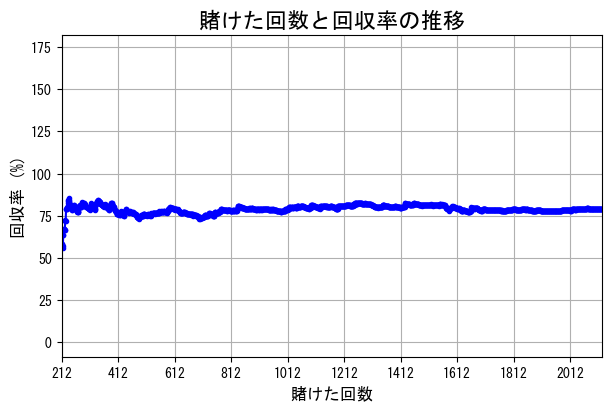

総払い戻し金額: 671490.0円
賭けた回数: 2124回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate
0,202301010102,0.0,100,100,0.0,0.000000
1,202301010104,0.0,100,200,0.0,0.000000
2,202301010105,1040.0,400,600,1040.0,1.733333
3,202301010106,0.0,100,700,1040.0,1.485714
4,202301010108,0.0,100,800,1040.0,1.300000
...,...,...,...,...,...,...
2119,202310030801,0.0,100,849200,668630.0,0.787365
2120,202310030804,0.0,100,849300,668630.0,0.787272
2121,202310030805,2860.0,1000,850300,671490.0,0.789710
2122,202310030806,0.0,100,850400,671490.0,0.789617


In [326]:
total_returns = p.calc_returns_rate(df_23)
total_returns

## NNmodel

In [327]:
%autoreload

In [328]:
nn = predict.NNModel(train_df=df, returns_df=returns, bet_type='sanrenpuku', threshold=0.5, stochastic_variation=False)
pred_df = nn.predict_target(df_23)
print(pred_df['predicted_target'].value_counts())
print(pred_df)

c:\Users\SV8\m\p\keiba\modules\predict.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
c:\Users\SV8\m\p\keiba\modules\predict.py:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

Confusion Matrix:
 [[5493 1766]
 [ 658 1451]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.76      0.82      7259
           1       0.45      0.69      0.54      2109

    accuracy                           0.74      9368
   macro avg       0.67      0.72      0.68      9368
weighted avg       0.79      0.74      0.76      9368



c:\Users\SV8\m\p\keiba\modules\predict.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
c:\Users\SV8\m\p\keiba\modules\predict.py:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

predicted_target
0    30926
1    16347
Name: count, dtype: int64
            race_id    horse_id  jockey_id  trainer_id  owner_id  rank  frame  \
0      202301010101  2021100648       1095        1128    281008   5.0      1   
1      202301010101  2021100159       1157        1186    170800   6.0      2   
2      202301010101  2021100265       1197        1192    320803   7.0      3   
3      202301010101  2021105553       5339        1160    680031   4.0      4   
4      202301010101  2021101429       1170        1026    425031   1.0      5   
...             ...         ...        ...         ...       ...   ...    ...   
47268  202310030812  2019102542       1208        1161     17803   1.0      6   
47269  202310030812  2020103754       1116        1104    651031   6.0      7   
47270  202310030812  2020100400       1193        1092    180800   4.0      7   
47271  202310030812  2020103663        732        1092    226800   2.0      8   
47272  202310030812  2017104623       1125  

c:\Users\SV8\m\p\keiba\modules\predict.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
c:\Users\SV8\m\p\keiba\modules\predict.py:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

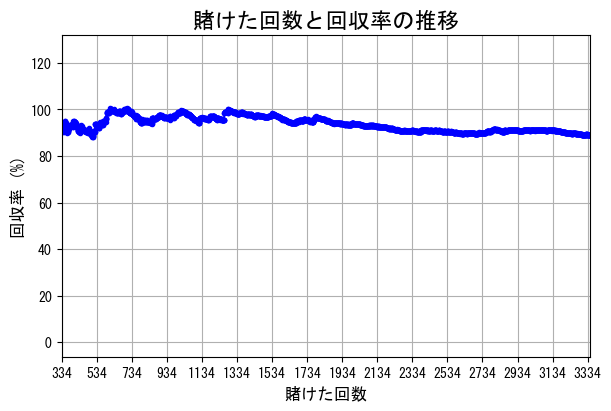

総払い戻し金額: 3259580.0円
賭けた回数: 3349回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate
0,202301010101,0.0,1000,1000,0.0,0.000000
1,202301010102,0.0,400,1400,0.0,0.000000
2,202301010103,1930.0,400,1800,1930.0,1.072222
3,202301010104,0.0,1000,2800,1930.0,0.689286
4,202301010105,1040.0,1000,3800,2970.0,0.781579
...,...,...,...,...,...,...
3344,202310030808,0.0,1000,3655900,3256580.0,0.890774
3345,202310030809,0.0,400,3656300,3256580.0,0.890676
3346,202310030810,0.0,1000,3657300,3256580.0,0.890433
3347,202310030811,3000.0,2000,3659300,3259580.0,0.890766


In [329]:
total_returns = nn.calc_returns_rate(df_23)
total_returns

## LGBmodel

In [340]:
%autoreload

In [342]:
lgb = predict.LGBModel(train_df=df, returns_df=returns, bet_type='sanrenpuku', threshold=None, stochastic_variation=False)
pred_df = lgb.predict_target(df_23)
print(pred_df['predicted_target'].value_counts())
print(pred_df)

c:\Users\SV8\m\p\keiba\modules\predict.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
c:\Users\SV8\m\p\keiba\modules\predict.py:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

[LightGBM] [Info] Number of positive: 29212, number of negative: 29212
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012753 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10874
[LightGBM] [Info] Number of data points in the train set: 58424, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Confusion Matrix:
 [[6622  637]
 [1214  895]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      7259
           1       0.58      0.42      0.49      2109

    accuracy                           0.80      9368
   macro avg       0.71      0.67      0.68      9368
weighted avg       0.79      0.80      0.79      9368

Feature Importance:
                      feature  importance
38    race_interval_category         257
13              ground_state         221
12                 

c:\Users\SV8\m\p\keiba\modules\predict.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
c:\Users\SV8\m\p\keiba\modules\predict.py:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

predicted_target
0    36100
1    11173
Name: count, dtype: int64
            race_id    horse_id  jockey_id  trainer_id  owner_id  rank  frame  \
0      202301010101  2021100648       1095        1128    281008   5.0      1   
1      202301010101  2021100159       1157        1186    170800   6.0      2   
2      202301010101  2021100265       1197        1192    320803   7.0      3   
3      202301010101  2021105553       5339        1160    680031   4.0      4   
4      202301010101  2021101429       1170        1026    425031   1.0      5   
...             ...         ...        ...         ...       ...   ...    ...   
47268  202310030812  2019102542       1208        1161     17803   1.0      6   
47269  202310030812  2020103754       1116        1104    651031   6.0      7   
47270  202310030812  2020100400       1193        1092    180800   4.0      7   
47271  202310030812  2020103663        732        1092    226800   2.0      8   
47272  202310030812  2017104623       1125  

c:\Users\SV8\m\p\keiba\modules\predict.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
c:\Users\SV8\m\p\keiba\modules\predict.py:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

,race_id,horse_id,jockey_id,trainer_id,owner_id,rank,frame,number,sex,age,...,parent_3,parent_4,parent_5,date_encoded,horse_id_encoded,jockey_id_encoded,trainer_id_encoded,owner_id_encoded,predicted_proba,predicted_target
0,202301010101,2021100648,1095,1128,281008,5.0,1,1,1,2,...,436.0,584.0,1852.0,475,8663,47,123,451,0.327781,0
1,202301010101,2021100159,1157,1186,170800,6.0,2,2,0,2,...,462.0,780.0,6337.0,475,8467,93,181,289,0.104922,0
2,202301010101,2021100265,1197,1192,320803,7.0,3,3,1,2,...,334.0,745.0,6482.0,475,8515,130,187,523,0.290223,0
3,202301010101,2021105553,5339,1160,680031,4.0,4,4,1,2,...,406.0,741.0,5141.0,475,10705,150,155,1030,0.353797,0
4,202301010101,2021101429,1170,1026,425031,1.0,5,5,0,2,...,329.0,780.0,4573.0,475,8966,105,30,701,0.835989,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47268,202310030812,2019102542,1208,1161,17803,1.0,6,8,1,4,...,301.0,618.0,1738.0,516,2781,141,156,38,0.634115,1
47269,202310030812,2020103754,1116,1104,651031,6.0,7,9,0,3,...,337.0,384.0,1551.0,516,6288,59,100,1006,0.207851,0
47270,202310030812,2020100400,1193,1092,180800,4.0,7,10,1,3,...,288.0,780.0,6282.0,516,4200,126,88,301,0.108806,0
47271,202310030812,2020103663,732,1092,226800,2.0,8,11,2,3,...,288.0,185.0,1206.0,516,6224,9,88,363,0.281166,0


c:\Users\SV8\m\p\keiba\modules\predict.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
c:\Users\SV8\m\p\keiba\modules\predict.py:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

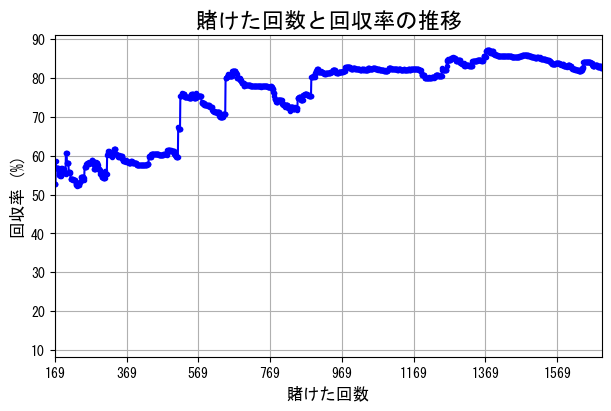

総払い戻し金額: 2762940.0円
賭けた回数: 1693回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate
0,202301010105,1040.0,8400,8400,1040.0,0.123810
1,202301010106,0.0,100,8500,1040.0,0.122353
2,202301010109,0.0,100,8600,1040.0,0.120930
3,202301010110,0.0,100,8700,1040.0,0.119540
4,202301010201,310.0,100,8800,1350.0,0.153409
...,...,...,...,...,...,...
1688,202310030705,4990.0,5600,3319700,2760080.0,0.831425
1689,202310030804,0.0,100,3319800,2760080.0,0.831399
1690,202310030805,2860.0,22000,3341800,2762940.0,0.826782
1691,202310030810,0.0,100,3341900,2762940.0,0.826757


In [339]:
total_returns = lgb.calc_returns_rate(df_23)
total_returns

## XGBmodel

In [ ]:
xgb = predict.LGBModel(train_df=df, returns_df=returns, bet_type='sanrenpuku', threshold=None, stochastic_variation=False)
print(pred_df['predicted_target'].value_counts())
print(pred_df)

In [ ]:
pred_df = xgb.predict_target(df_23)
pred_df

In [ ]:
total_returns = xgb.calc_returns_rate(df_23)
total_returns